In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score

In [ ]:
# Importing Data

df = pd.read_csv(r'/content/Salary_Prediction_Data.csv')
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5/18/2014,1/7/2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7/28/2014,1/7/2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,4/3/2013,1/7/2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11/20/2014,1/7/2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6/28/2011,1/7/2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1/14/2014,1/7/2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1/23/2014,1/7/2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3/17/2014,1/7/2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [ ]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [ ]:
# Checking for null data

df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [ ]:
# Dropping null values from database

df.dropna(inplace=True)

In [ ]:
# Checking unique value counts of DESIGNATION in the database

df['DESIGNATION'].value_counts()

DESIGNATION
Analyst           1943
Senior Analyst     356
Associate          158
Manager             81
Senior Manager      61
Director            32
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of UNIT in the database

df['UNIT'].value_counts()

UNIT
IT            460
Finance       445
Operations    437
Marketing     436
Web           428
Management    425
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of AGE in the database

df['AGE'].value_counts()

AGE
25.0    484
22.0    421
23.0    398
24.0    389
21.0    354
28.0    130
26.0     94
27.0     64
32.0     62
29.0     34
35.0     32
31.0     27
30.0     26
33.0     21
34.0     18
39.0     16
36.0     12
38.0     11
37.0     11
40.0      7
41.0      5
45.0      5
42.0      4
43.0      3
44.0      3
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of PAST EXP in the database

df['PAST EXP'].value_counts()

PAST EXP
0     1298
1      494
2      360
3      167
5       56
4       56
6       47
8       27
7       26
10      21
11      17
9       16
13      11
12      10
17       6
15       6
14       4
16       4
18       2
19       2
23       1
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of SEX in the database

df['SEX'].value_counts()

SEX
F    1340
M    1291
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of RATINGS in the database

df['RATINGS'].value_counts()

RATINGS
4.0    670
2.0    666
3.0    657
5.0    638
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of LEAVES USED in the database

df['LEAVES USED'].value_counts()

LEAVES USED
19.0    184
25.0    182
29.0    173
28.0    172
26.0    171
22.0    170
15.0    167
24.0    163
16.0    163
18.0    161
17.0    160
21.0    157
20.0    155
27.0    155
30.0    150
23.0    148
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of LEAVES REMAINING in the database

df['LEAVES REMAINING'].value_counts()

LEAVES REMAINING
11.0    184
5.0     182
1.0     173
2.0     172
4.0     171
8.0     170
15.0    167
6.0     163
14.0    163
12.0    161
13.0    160
9.0     157
10.0    155
3.0     155
0.0     150
7.0     148
Name: count, dtype: int64

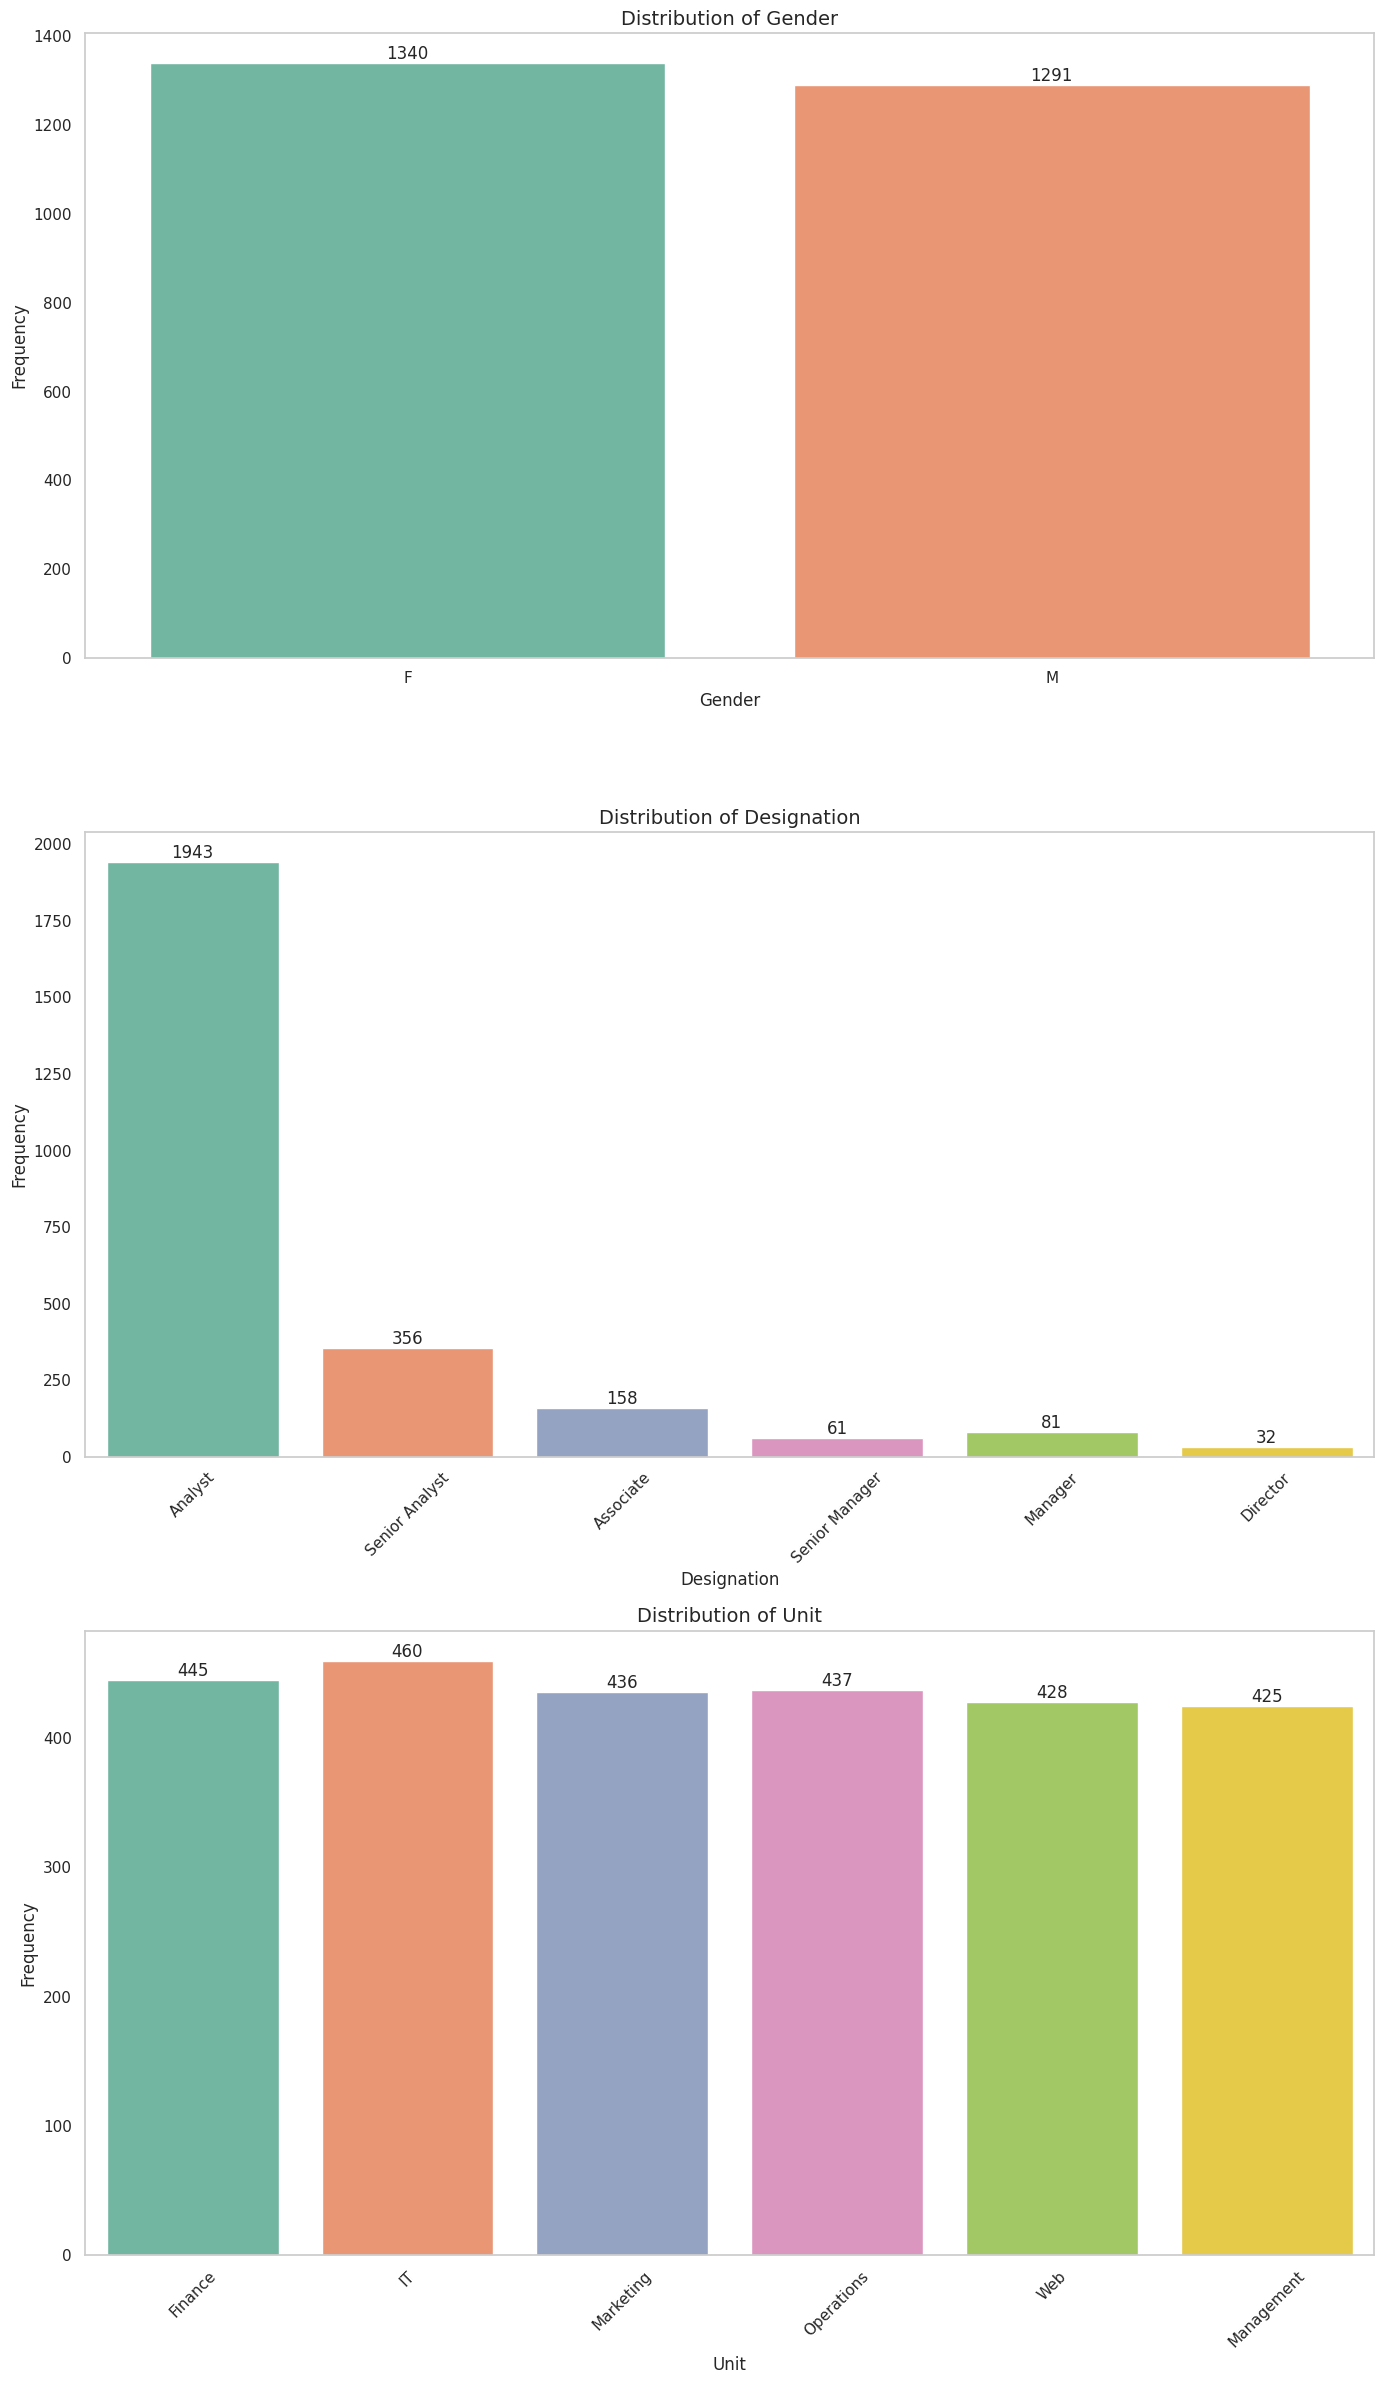

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subgraphs
fig, ax = plt.subplots(3, 1, figsize=(14, 24))

# Color palette
palette = "Set2"

# First subgraph: gender distribution
gender_plot = sns.countplot(x='SEX', data=df, ax=ax[0], palette=palette)
ax[0].set_xlabel('Gender', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].set_title('Distribution of Gender', fontsize=14)
ax[0].grid(False)
# Add the number labels
for container in gender_plot.containers:
    gender_plot.bar_label(container)

# Second subgraph: distribution of designations
designation_plot = sns.countplot(x='DESIGNATION', data=df, ax=ax[1], palette=palette)
ax[1].set_xlabel('Designation', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].set_title('Distribution of Designation', fontsize=14)
ax[1].grid(False)
ax[1].tick_params(axis='x', rotation=45)
# Add the number labels
for container in designation_plot.containers:
    designation_plot.bar_label(container)

# Third subgraph: distribution of units
unit_plot = sns.countplot(x='UNIT', data=df, ax=ax[2], palette=palette)
ax[2].set_xlabel('Unit', fontsize=12)
ax[2].set_ylabel('Frequency', fontsize=12)
ax[2].set_title('Distribution of Unit', fontsize=14)
ax[2].grid(False)
ax[2].tick_params(axis='x', rotation=45)
# Add the number labels
for container in unit_plot.containers:
    unit_plot.bar_label(container)

# Adjust the spacings for a better presentation
plt.tight_layout()

# Show graphs
plt.show()

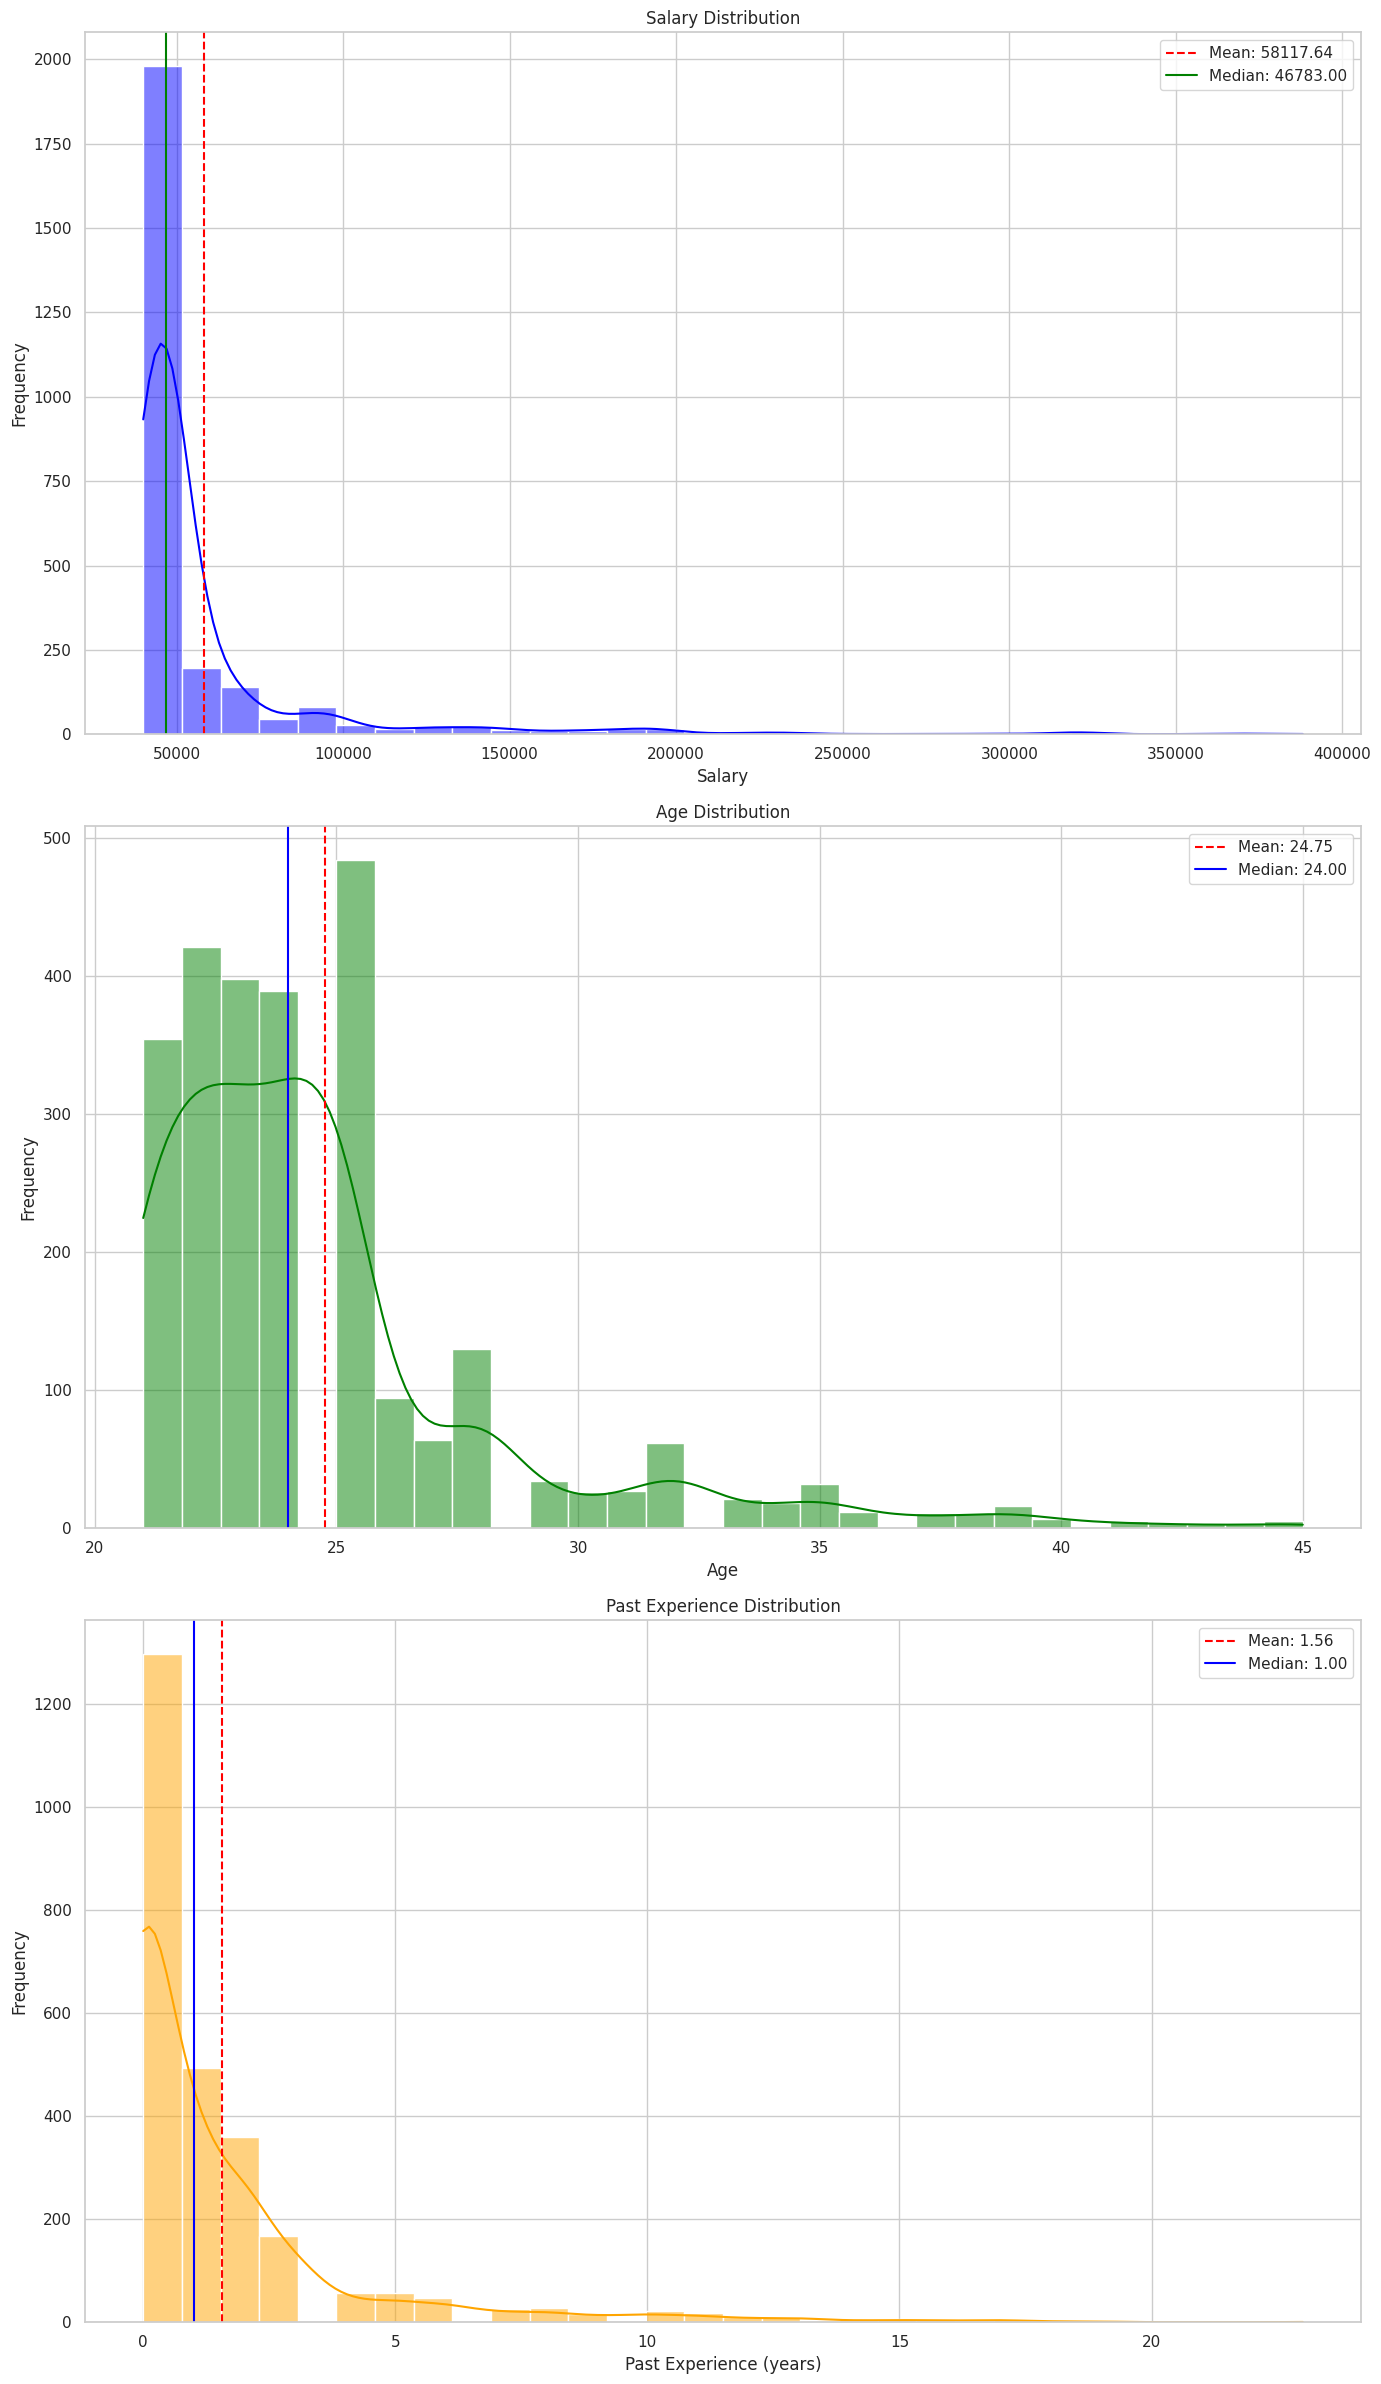

In [ ]:
# Setting the aesthetic style for the plots
sns.set(style="whitegrid")

# Create a figure with four subplots
fig, ax = plt.subplots(3, 1, figsize=(14, 24))

# Salary Distribution
sns.histplot(df['SALARY'], kde=True, bins=30, color='blue', ax=ax[0])
ax[0].set_title('Salary Distribution')
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Frequency')
ax[0].axvline(df['SALARY'].mean(), color='red', linestyle='--', label=f"Mean: {df['SALARY'].mean():.2f}")
ax[0].axvline(df['SALARY'].median(), color='green', linestyle='-', label=f"Median: {df['SALARY'].median():.2f}")
ax[0].legend()

# Age Distribution
sns.histplot(df['AGE'].dropna(), kde=True, bins=30, color='green', ax=ax[1])
ax[1].set_title('Age Distribution')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')
ax[1].axvline(df['AGE'].mean(), color='red', linestyle='--', label=f"Mean: {df['AGE'].mean():.2f}")
ax[1].axvline(df['AGE'].median(), color='blue', linestyle='-', label=f"Median: {df['AGE'].median():.2f}")
ax[1].legend()

# Past Experience Distribution
sns.histplot(df['PAST EXP'], kde=True, bins=30, color='orange', ax=ax[2])
ax[2].set_title('Past Experience Distribution')
ax[2].set_xlabel('Past Experience (years)')
ax[2].set_ylabel('Frequency')
ax[2].axvline(df['PAST EXP'].mean(), color='red', linestyle='--', label=f"Mean: {df['PAST EXP'].mean():.2f}")
ax[2].axvline(df['PAST EXP'].median(), color='blue', linestyle='-', label=f"Median: {df['PAST EXP'].median():.2f}")
ax[2].legend()

# Adjust spacing between subplots
plt.tight_layout()

#show the plot
plt.show()

**Salary Distribution:**

*   Mean: $58,117.64

*   Median: $46,783.00

*   The salary distribution is heavily right-skewed, with most salaries concentrated below $100,000. There are some outliers above this amount, which explains the difference between the mean and the median.

**Age Distribution:**

*   Mean: 24.75 years

*   Median: 24.00 years

*  The majority of employees are between 21 and 27 years old, with a peak around 24 years. The distribution shows that most employees are young, with a gradual decrease in the number of older employees.

**Past Experience Distribution:**
*   Mean: 1.56 years

*  Median: 1.00 year

*   The distribution of past experience is also right-skewed. Most employees have little past experience (less than 2 years), with some employees having up to 20 years of experience. The majority of employees have very limited past experience.

**These distributions provide useful information about the demographic and professional characteristics of the employees. Salaries exhibit a significant disparity, ages are predominantly young, and past experience is generally low.**

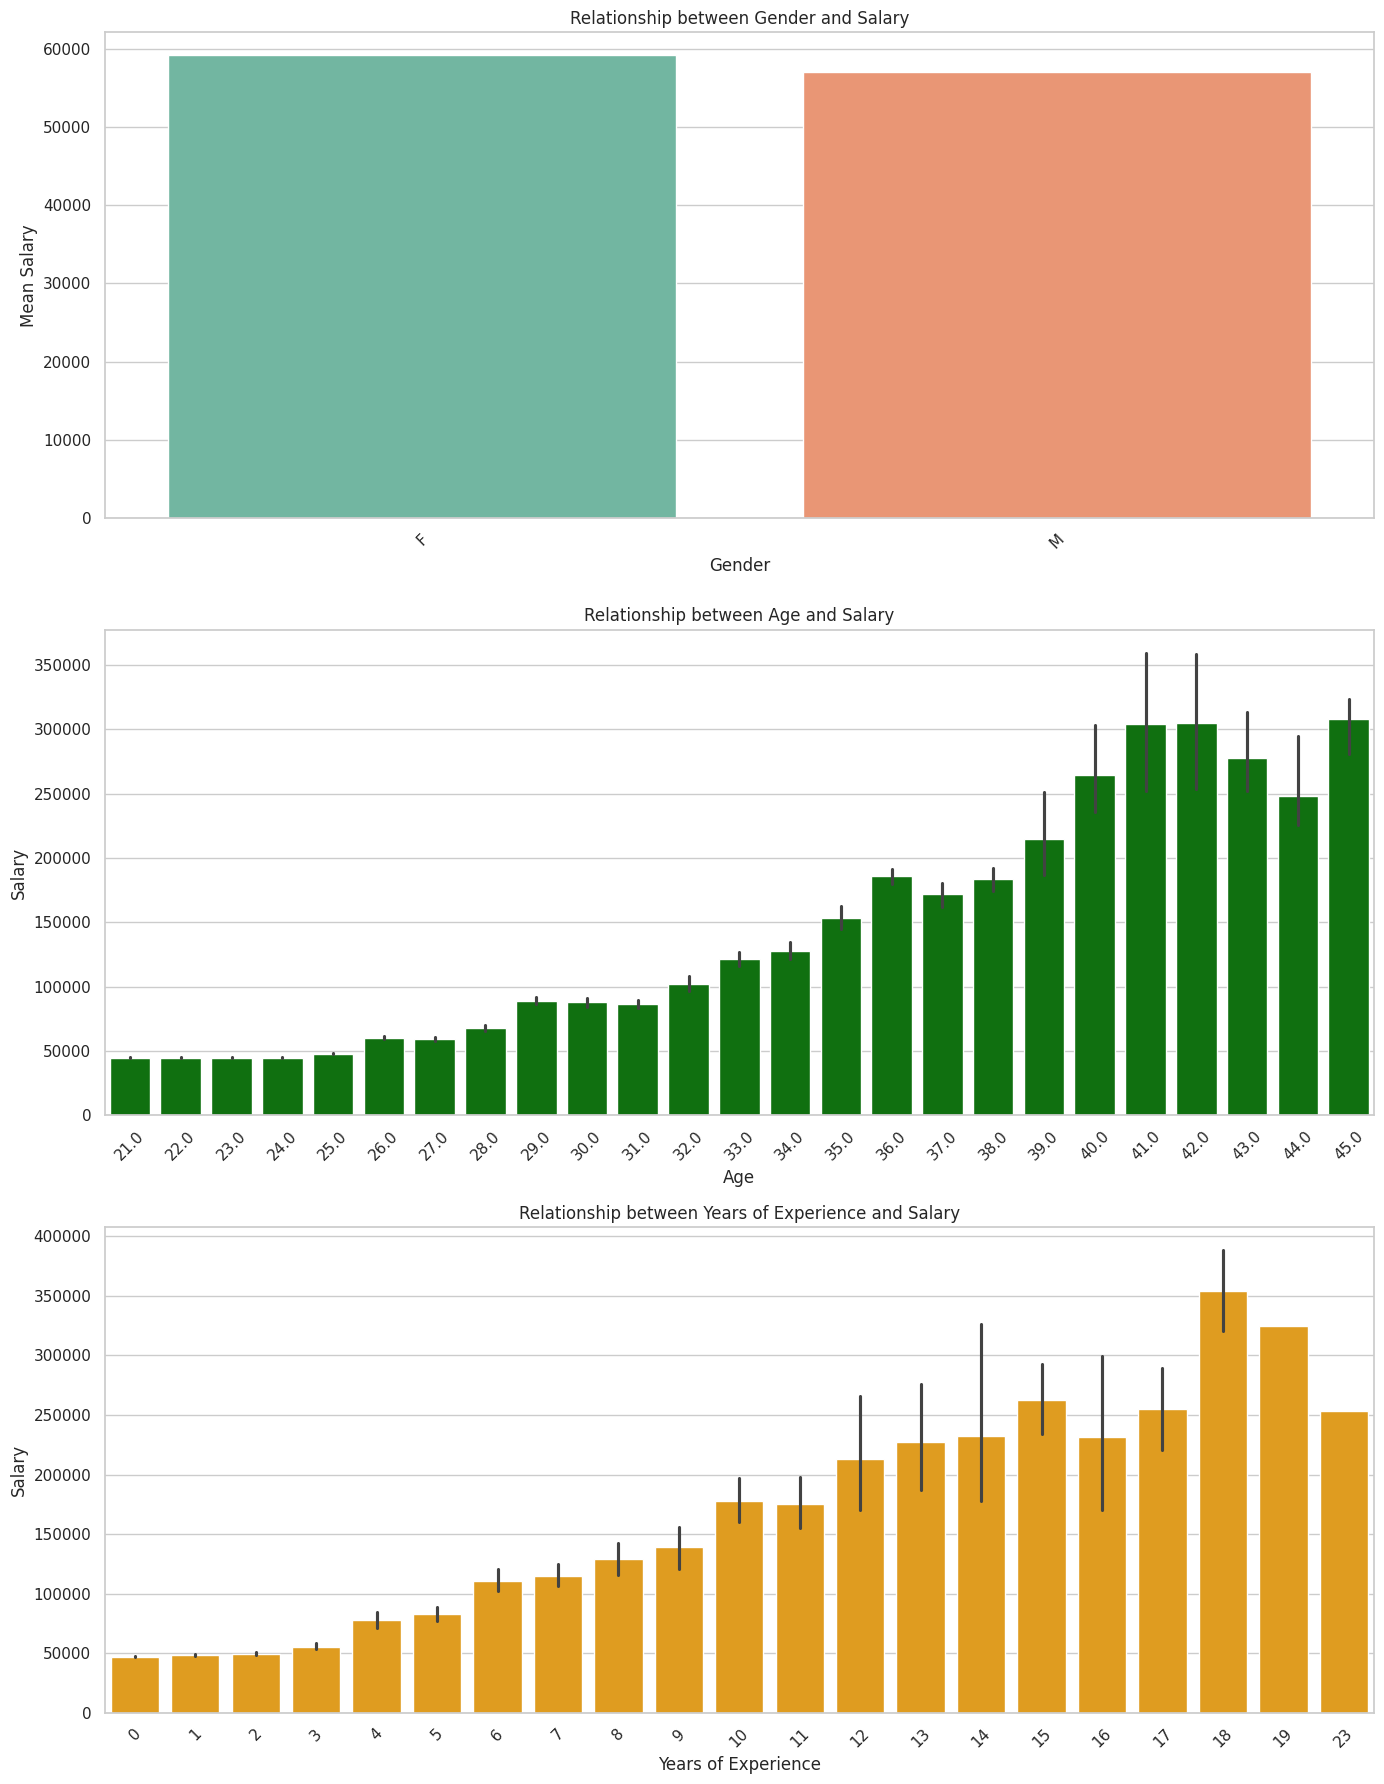

In [ ]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='SEX', y='SALARY', data=df, ax=ax[0], palette=palette, estimator=pd.Series.mean, ci=None)
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')
ax[0].tick_params(axis='x', rotation=45)

# Create a box plot for the relationship between Age and Salary in the second subplot
sns.barplot(x='AGE', y='SALARY', data=df, ax=ax[1], color='green')
ax[1].set(title='Relationship between Age and Salary', xlabel='Age', ylabel='Salary')
ax[1].tick_params(axis='x', rotation=45)

# Create a box plot for the relationship between Years of Experience and Salary in the third subplot
sns.barplot(x='PAST EXP', y='SALARY', data=df, ax=ax[2], color='orange')
ax[2].set(title='Relationship between Years of Experience and Salary', xlabel='Years of Experience', ylabel='Salary')
ax[2].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Relationship between Age and Salary:**


*   There is a clear trend showing that salary increases with age.
*   Employees in their early twenties have the lowest salaries, while those in their forties have the highest.

*  This trend indicates that salary tends to grow as employees gain more experience and likely advance in their careers.

**Relationship between Gender and Salary:**


*   The mean salary for both genders (F and M) appears to be relatively similar.

*   This suggests that there is no significant gender disparity in salary within this dataset.

**Relationship between Years of Experience and Salary:**


*   Similarly, there is a positive correlation between years of experience and salary.

*   Employees with fewer years of experience earn lower salaries, while those with more experience earn significantly higher salaries.


*   The increase in salary is gradual but becomes more pronounced after about 10 years of experience, indicating that extensive experience is highly valued and compensated.

**These graphs collectively suggest that within this dataset, salary is influenced more by age and years of experience than by gender. As employees age and gain more experience, their salaries tend to increase significantly.**

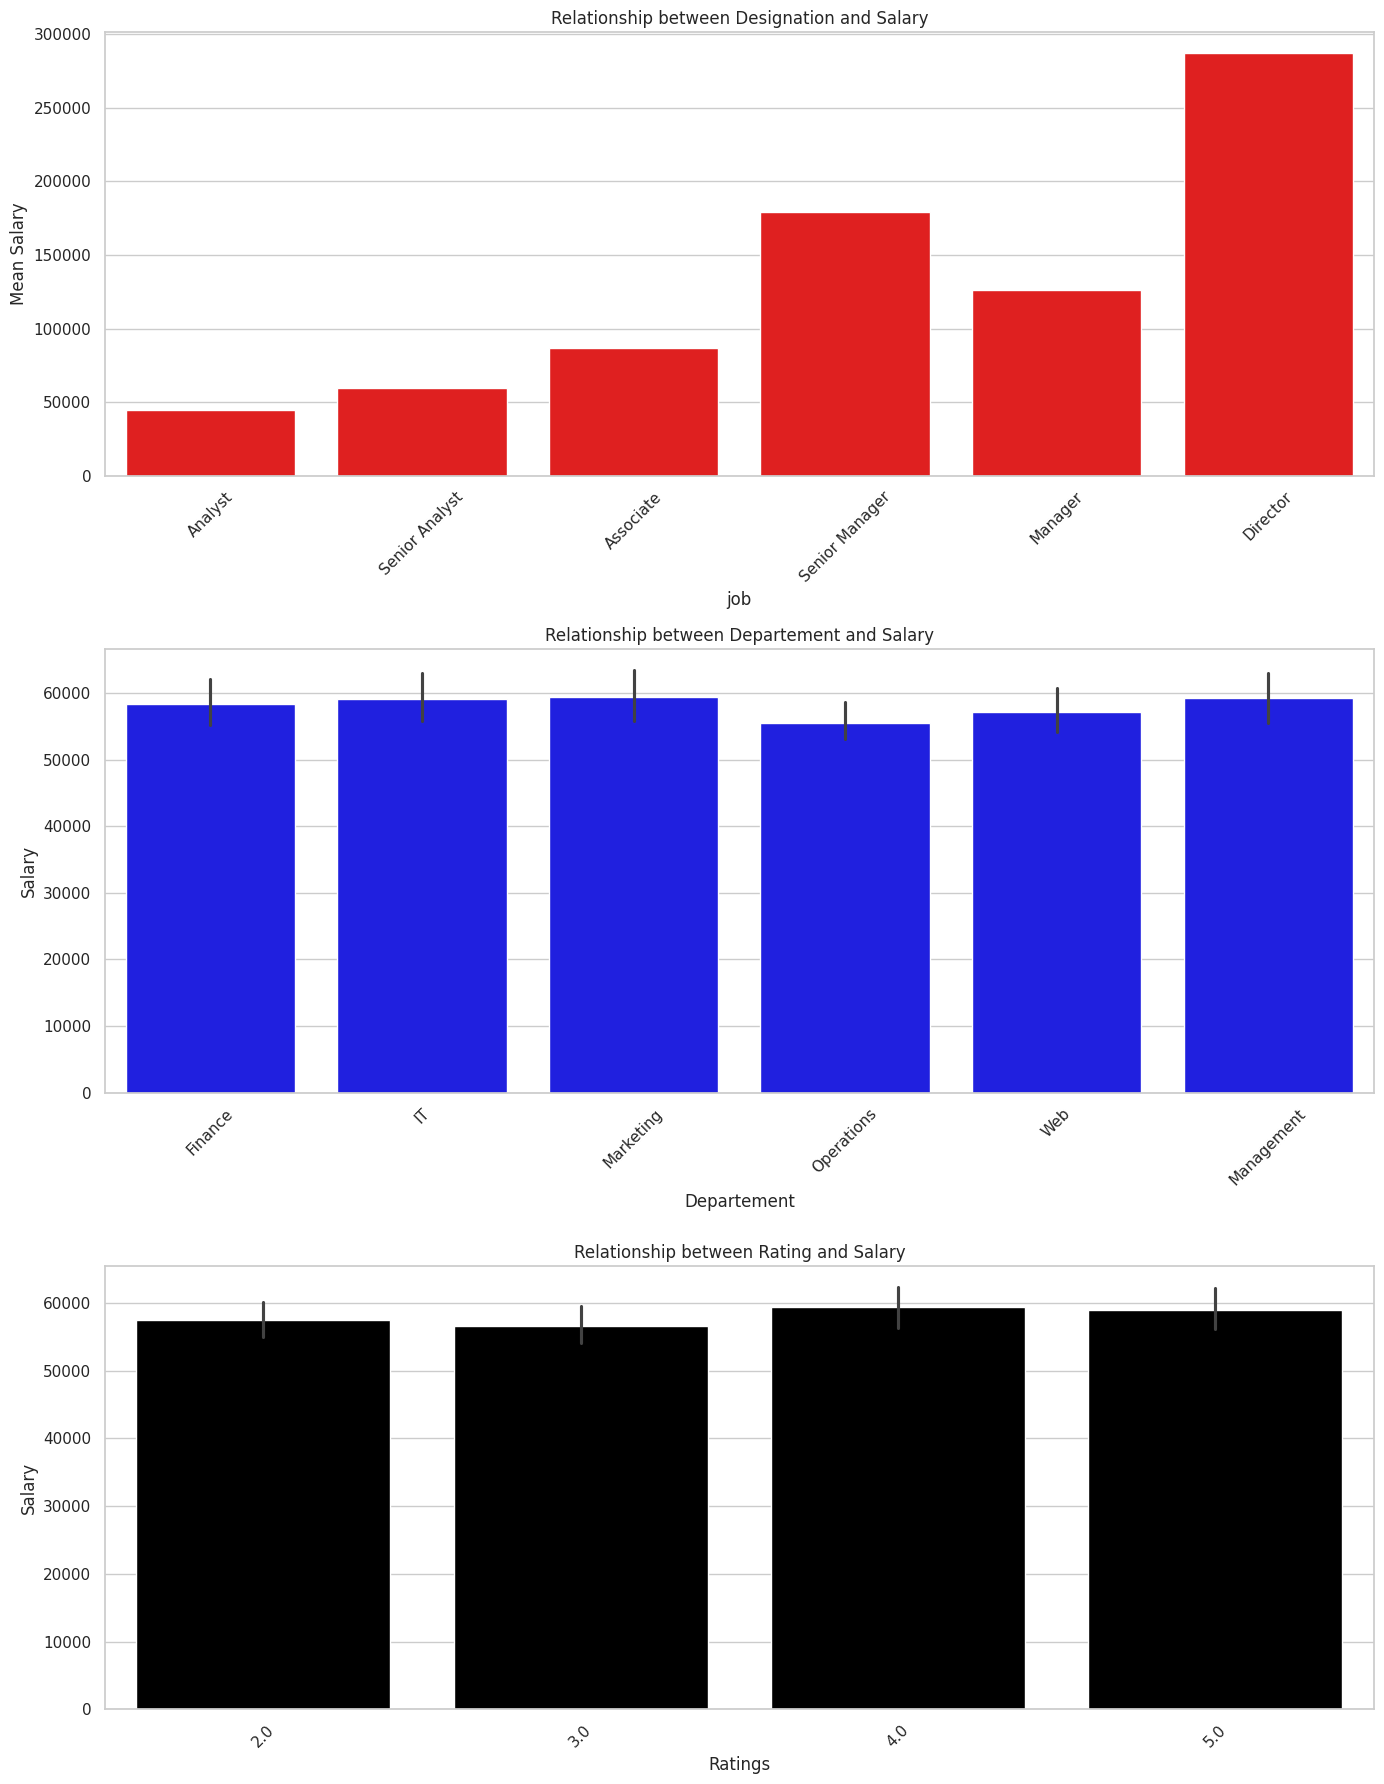

In [ ]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='DESIGNATION', y='SALARY', data=df, ax=ax[0], color='red', estimator=pd.Series.mean, ci=None)
ax[0].set(title='Relationship between Designation and Salary', xlabel='job', ylabel='Mean Salary')
ax[0].tick_params(axis='x', rotation=45)

# Create a box plot for the relationship between Age and Salary in the second subplot
sns.barplot(x='UNIT', y='SALARY', data=df, ax=ax[1], color='blue')
ax[1].set(title='Relationship between Departement and Salary', xlabel='Departement', ylabel='Salary')
ax[1].tick_params(axis='x', rotation=45)

# Create a box plot for the relationship between Years of Experience and Salary in the third subplot
sns.barplot(x='RATINGS', y='SALARY', data=df, ax=ax[2], color='black')
ax[2].set(title='Relationship between Rating and Salary', xlabel='Ratings', ylabel='Salary')
ax[2].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Relationship between Designation and Salary:**


*   The mean salary increases significantly with higher job designations.

*   Analysts and Senior Analysts have the lowest mean salaries.


*   Associates earn more than Analysts, but Senior Managers, Managers, and especially Directors earn substantially higher salaries.

*   This indicates a clear hierarchy in compensation, with higher-level positions commanding higher salaries.

**Relationship between Department and Salary:**


*   The mean salary across different departments (Finance, IT, Marketing, Operations, Web, Management) appears to be relatively similar.


*   There is no significant disparity in mean salaries between different departments.

*   This suggests that the company maintains a consistent salary structure across various departments.

**Relationship between Rating and Salary:**


*   The mean salary does not vary significantly with performance ratings (ranging from 2.0 to 5.0).


*   Employees with different performance ratings (2.0, 3.0, 4.0, 5.0) have similar mean salaries.

*   This indicates that performance ratings have minimal impact on salary within this dataset.

**In summary, job designation has a significant impact on salary, with higher-level positions earning substantially more. However, salaries are fairly consistent across different departments and performance ratings do not appear to influence salary significantly.**

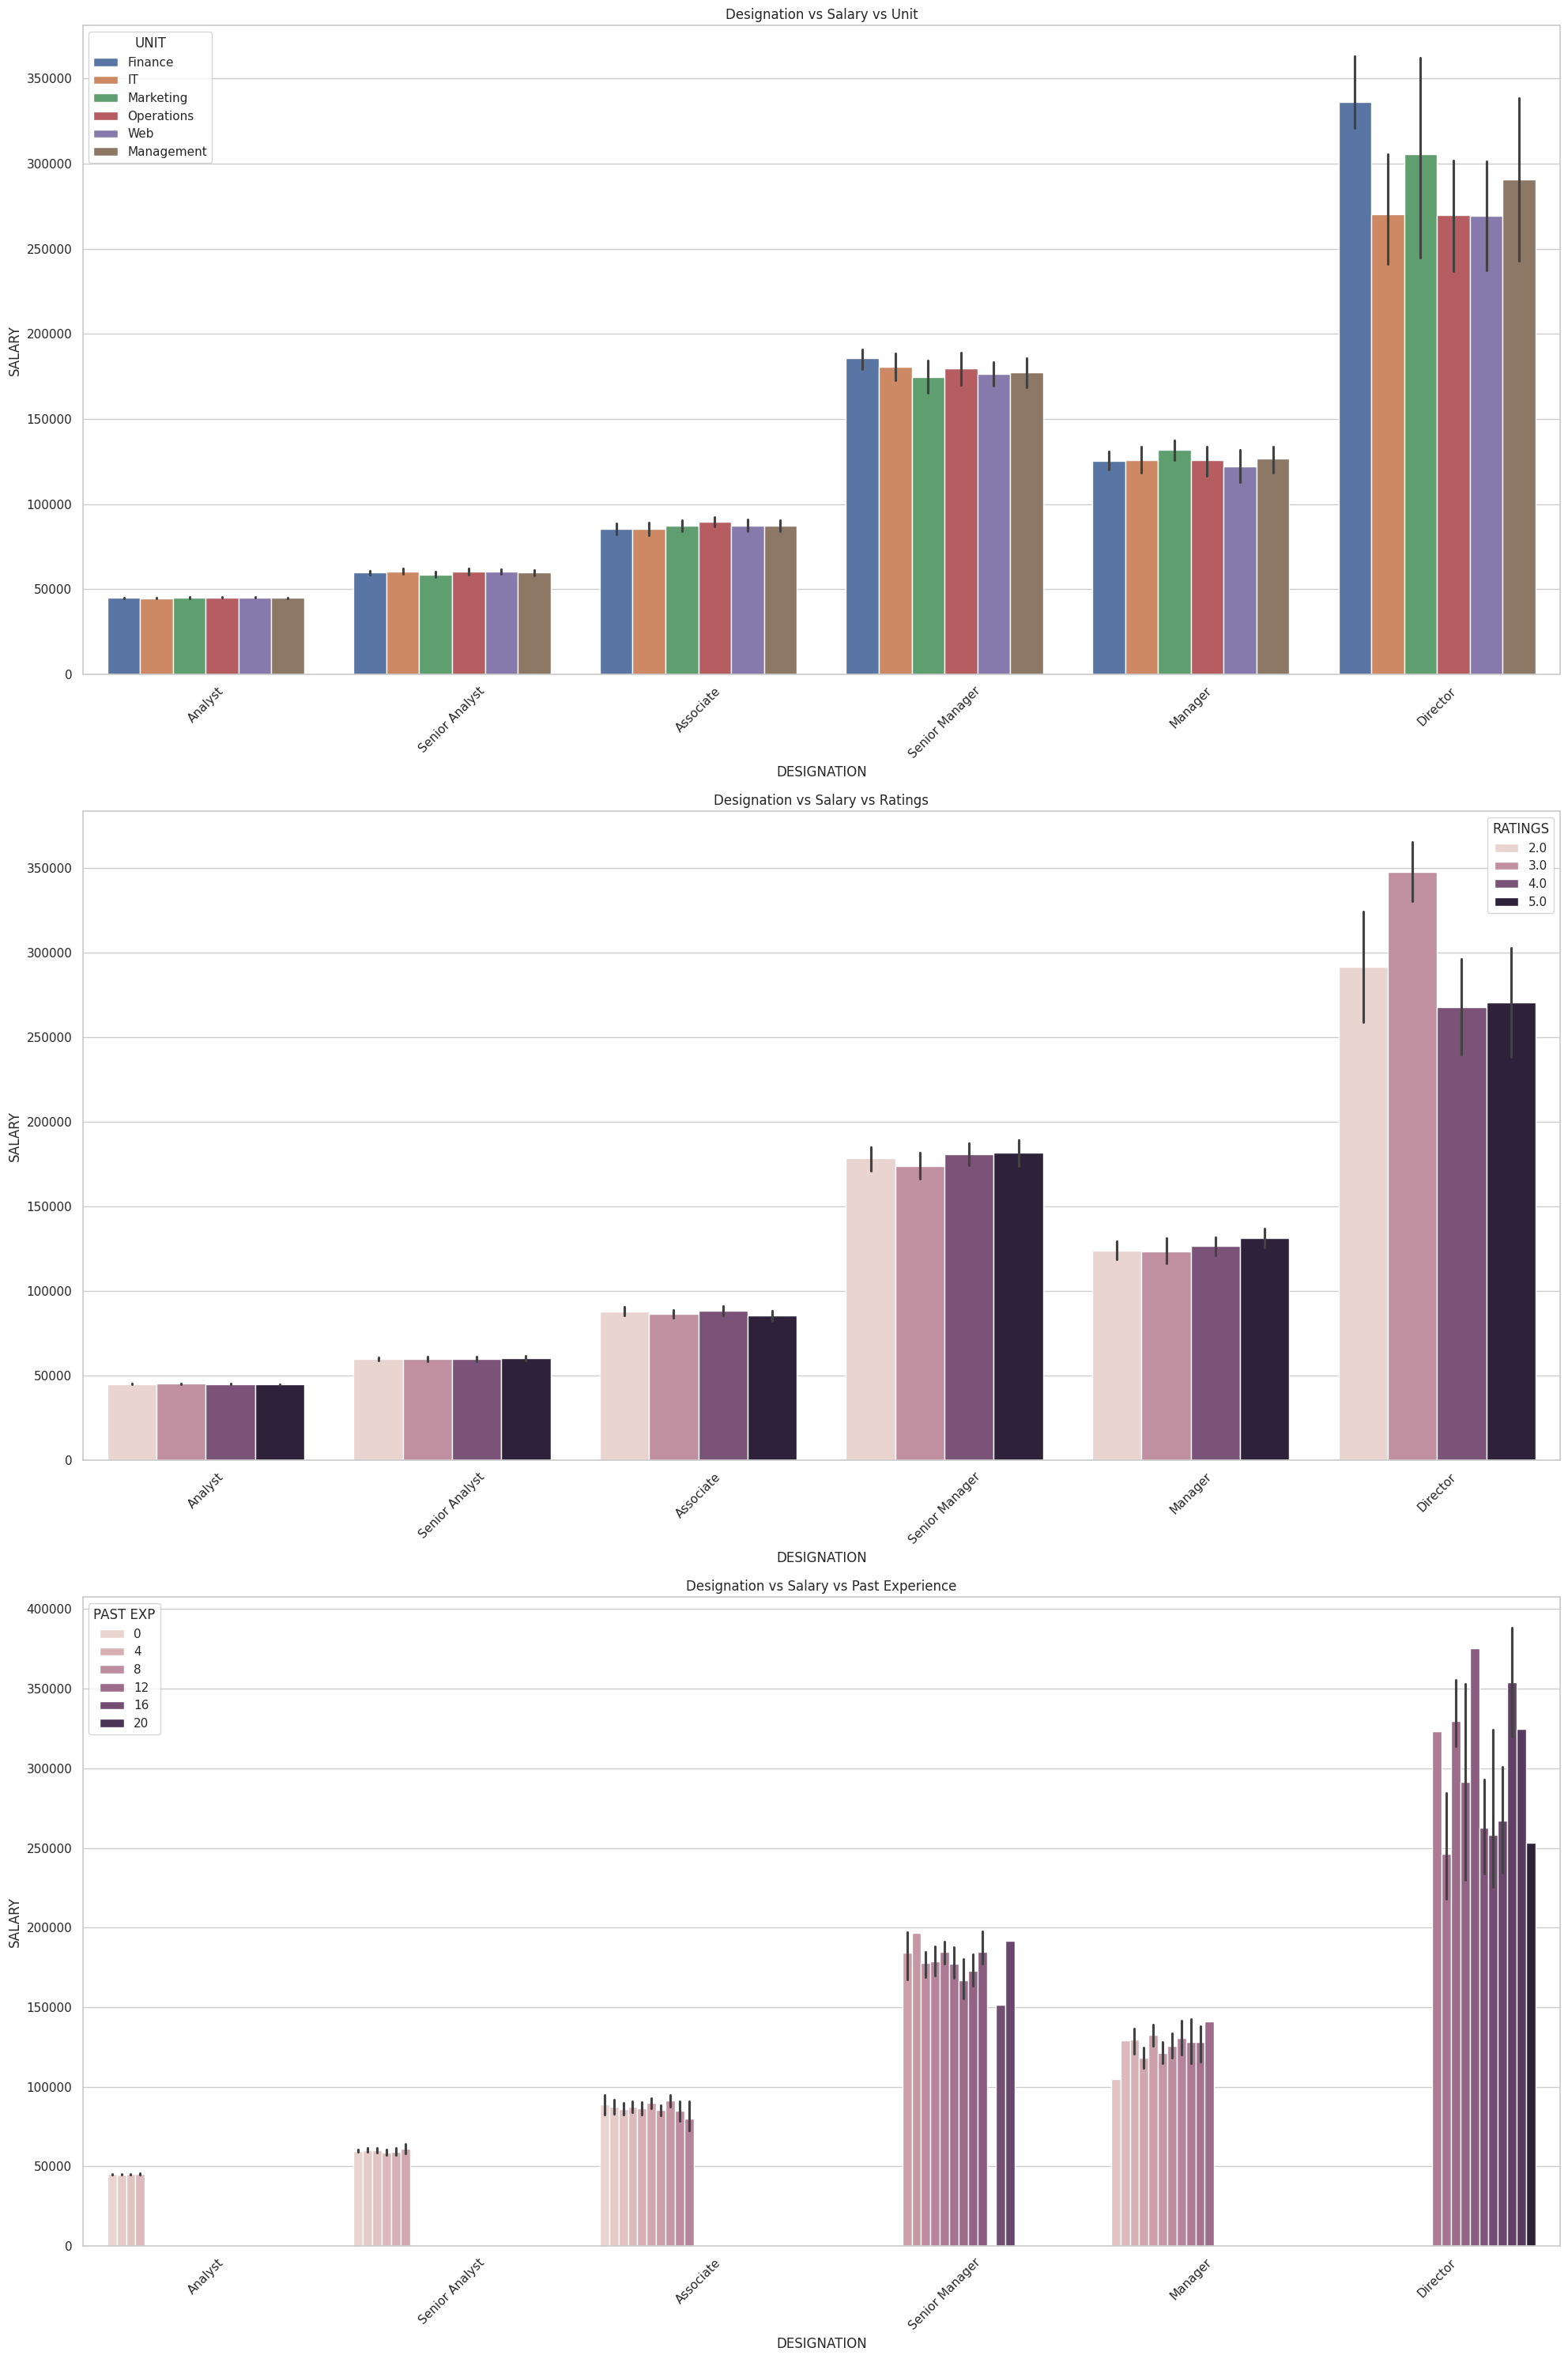

In [ ]:
# Setting the aesthetic style for the plots
sns.set(style="whitegrid")

# Create a larger figure for better clarity
fig, ax = plt.subplots(3, 1, figsize=(20, 30))

# Plot 1: Designation vs Salary vs Unit
sns.barplot(x='DESIGNATION', y='SALARY', data=df, hue='UNIT', ax=ax[0])
ax[0].set_title('Designation vs Salary vs Unit')
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Designation vs Salary vs Ratings
sns.barplot(x='DESIGNATION', y='SALARY', data=df, hue='RATINGS', ax=ax[1])
ax[1].set_title('Designation vs Salary vs Ratings')
ax[1].tick_params(axis='x', rotation=45)

# Plot 3: Designation vs Salary vs Past Experience
sns.barplot(x='DESIGNATION', y='SALARY', data=df, hue='PAST EXP', ax=ax[2])
ax[2].set_title('Designation vs Salary vs Past Experience')
ax[2].tick_params(axis='x', rotation=45)

# Adjust layout for better fit
plt.tight_layout()

#show the plot
plt.show()

**Designation vs. Salary vs. Unit:**


*   Across different units (Finance, IT, Marketing, Operations, Web, Management), there is a clear increase in salary with higher job designations.


*   Analysts and Senior Analysts have the lowest mean salaries across all units.

*   Associates earn more than Analysts, while Senior Managers, Managers, and especially Directors earn significantly higher salaries.

*   The salary differences among units for the same designation are minimal, indicating a consistent compensation structure across departments.

**Designation vs. Salary vs. Ratings:**


*   The relationship between job designation and salary is consistent regardless of performance ratings.


*   Analysts and Senior Analysts have lower salaries, and as the job designation increases to Associate, Senior Manager, Manager, and Director, the salary increases accordingly.

*   Performance ratings (2.0 to 5.0) have little to no impact on the salary within each job designation, suggesting that salary is more influenced by job designation rather than performance ratings.

**Designation vs. Salary vs. Past Experience:**


*   There is a positive correlation between past experience and salary across different job designations.


*   Employees with more years of past experience (4, 8, 12, 16, 20 years) tend to earn higher salaries within the same job designation.

*   The salary increase with past experience is more pronounced in higher job designations such as Senior Manager, Manager, and Director.


*   This indicates that past experience is a significant factor in determining salary, especially for higher-level positions.

**In summary, job designation is a primary factor influencing salary, with higher positions earning significantly more. This trend is consistent across different units and is not significantly impacted by performance ratings. Additionally, past experience plays a crucial role in salary determination, particularly for higher-level job designations.**


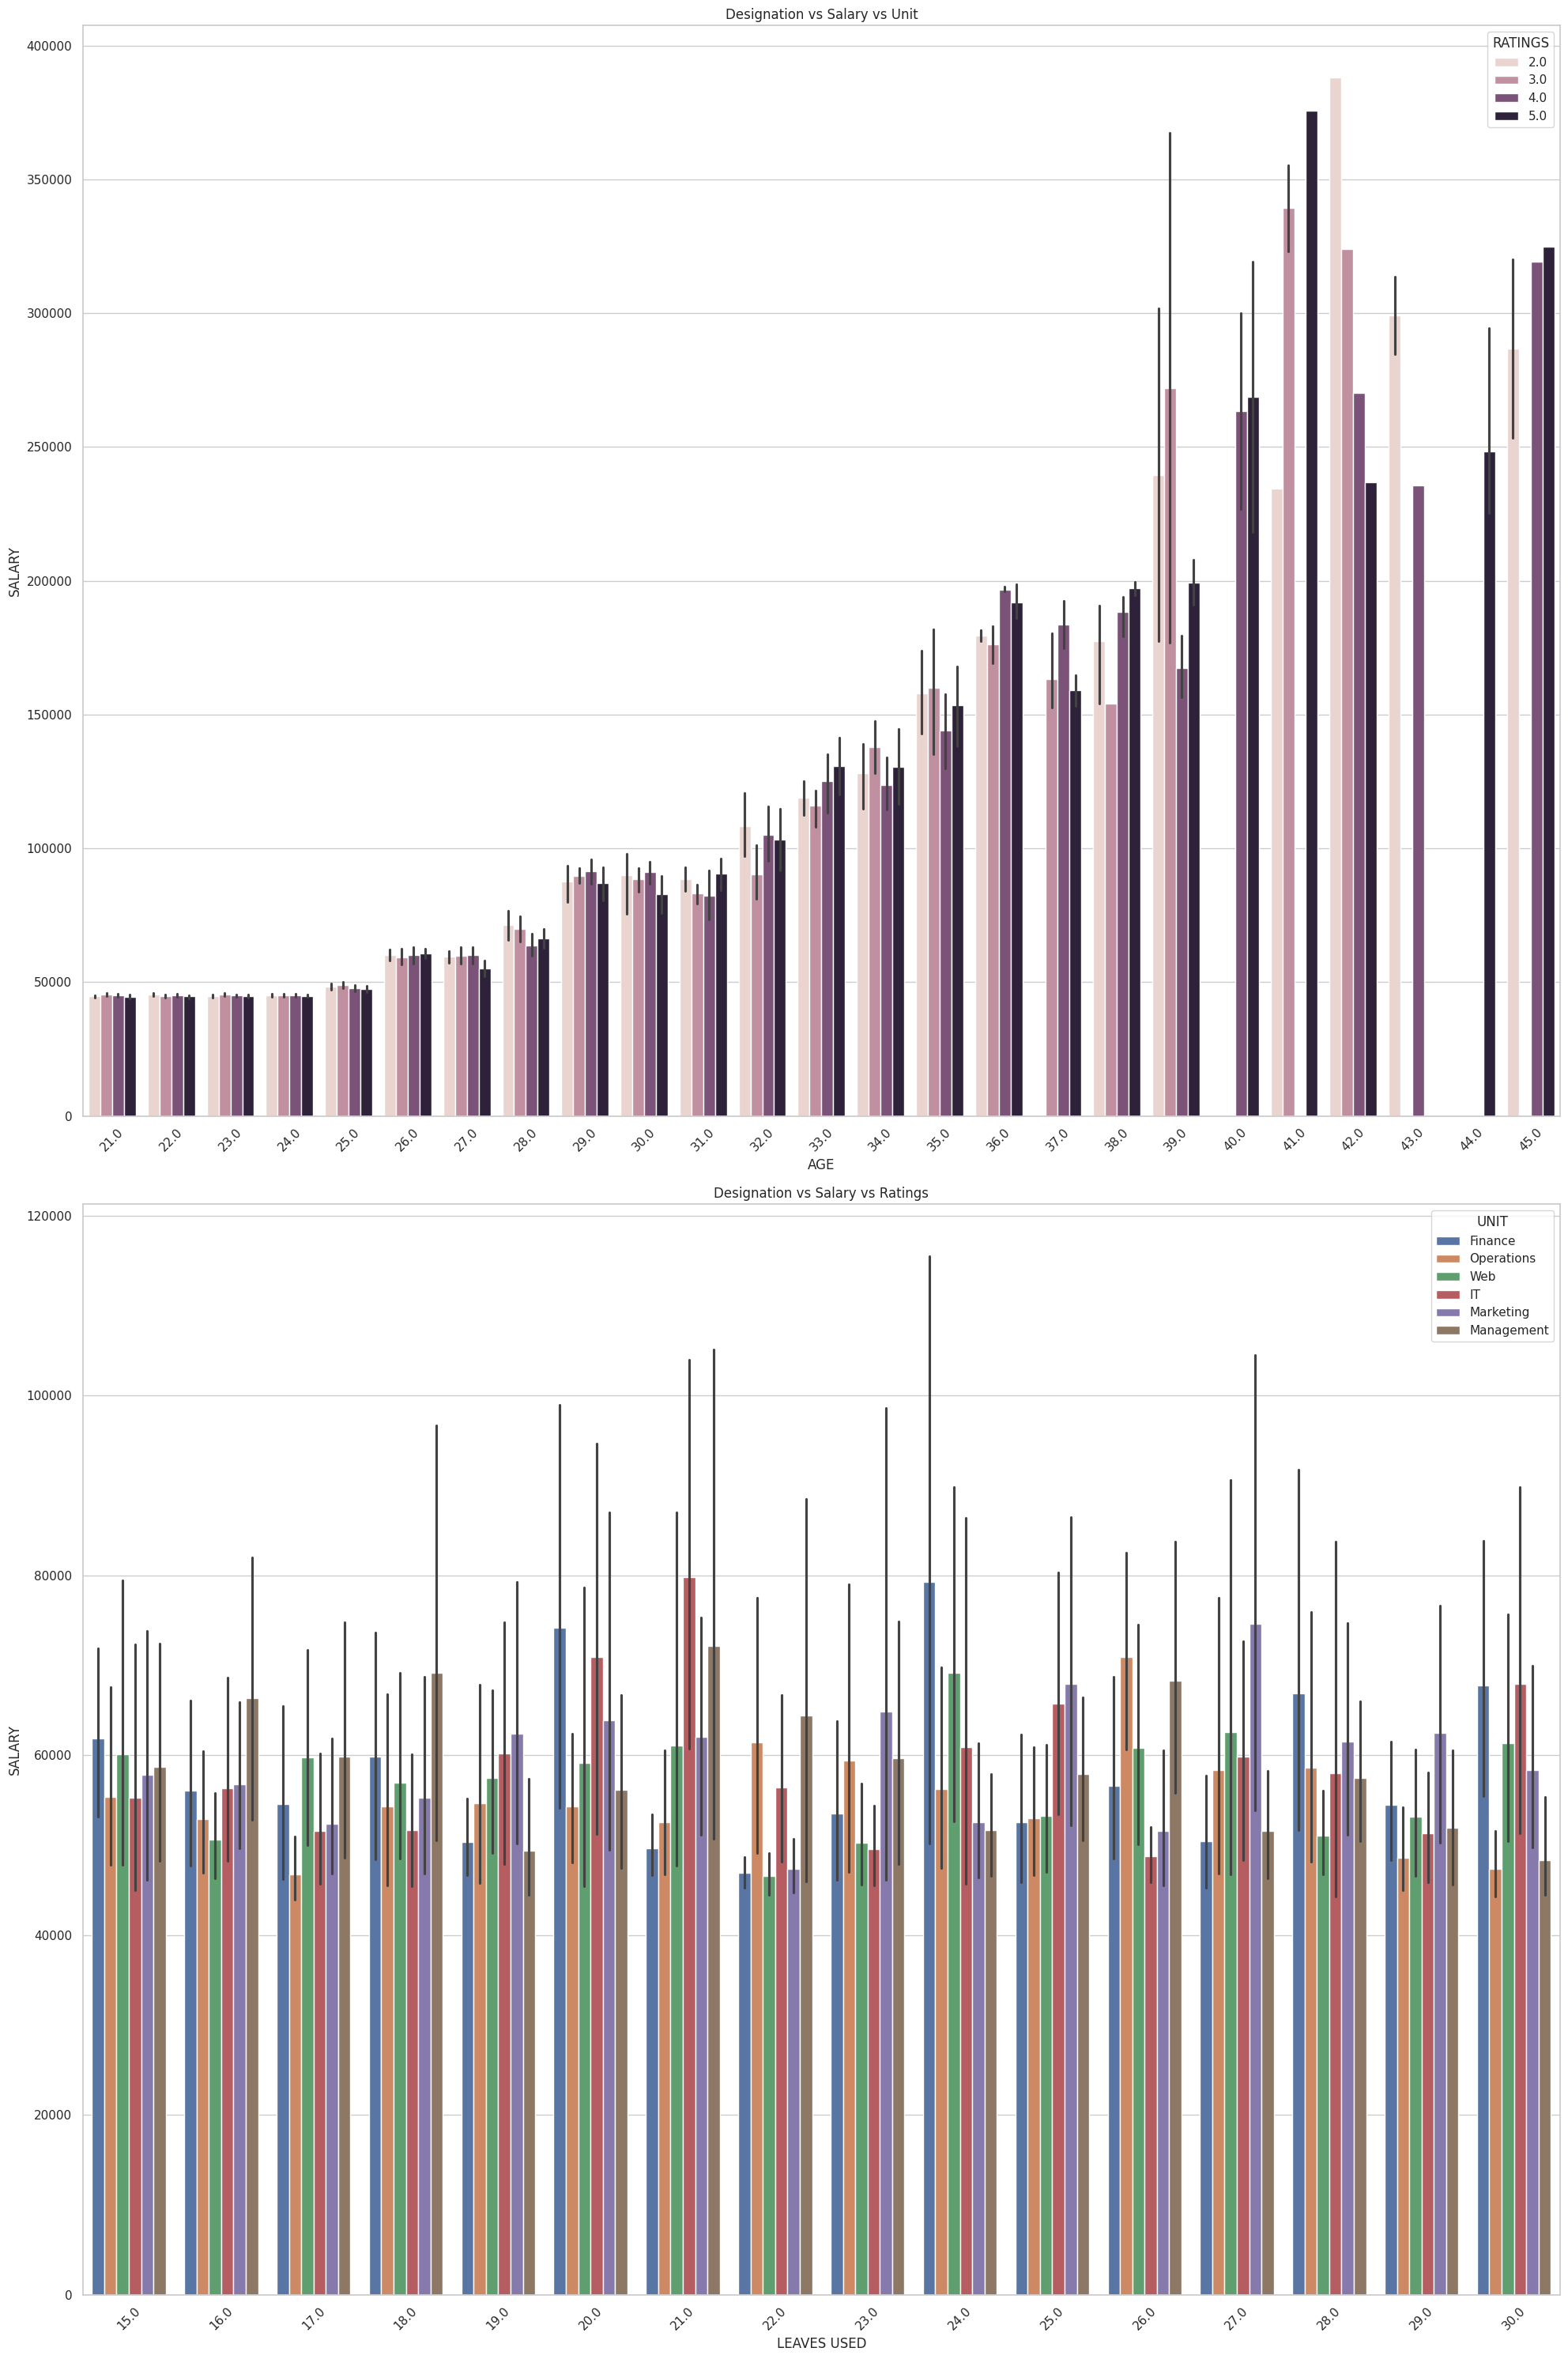

In [ ]:
# Setting the aesthetic style for the plots
sns.set(style="whitegrid")

# Create a larger figure for better clarity
fig, ax = plt.subplots(2, 1, figsize=(20, 30))

# Plot 1: Designation vs Salary vs Unit
sns.barplot(x='AGE', y='SALARY', data=df, hue='RATINGS', ax=ax[0])
ax[0].set_title('Designation vs Salary vs Unit')
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Designation vs Salary vs Ratings
sns.barplot(x='LEAVES USED', y='SALARY', data=df, hue='UNIT', ax=ax[1])
ax[1].set_title('Designation vs Salary vs Ratings')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout for better fit
plt.tight_layout()

#show the plot
plt.show()

**Age vs. Salary vs. Ratings:**


*   There is a clear positive correlation between age and salary.

*   Salaries generally increase with age, with a noticeable rise around the age of 30 and significant increases as employees approach their 40s and 50s.

*   Performance ratings (2.0 to 5.0) do not show a significant impact on salary within each age group. Salaries tend to be similar across different performance ratings for the same age.

*   This suggests that age, which could be a proxy for experience, is a major factor influencing salary, while performance ratings have less impact.

**Leaves Used vs. Salary vs. Unit:**


*   The relationship between the number of leaves used and salary shows considerable variability.


*   Across different units (Finance, Operations, Web, IT, Marketing, Management), there is no clear pattern indicating that the number of leaves used impacts salary significantly.

*   Salaries appear to be fairly consistent regardless of the number of leaves used, with some fluctuations but no discernible trend.

*   This indicates that the number of leaves taken by an employee does not significantly affect their salary, and salary structures remain consistent across different units.

**In summary, age is a significant determinant of salary, with older employees generally earning higher salaries. This trend is consistent regardless of performance ratings. On the other hand, the number of leaves used does not seem to have a strong impact on salary, and salaries are consistent across different units regardless of leave usage.**

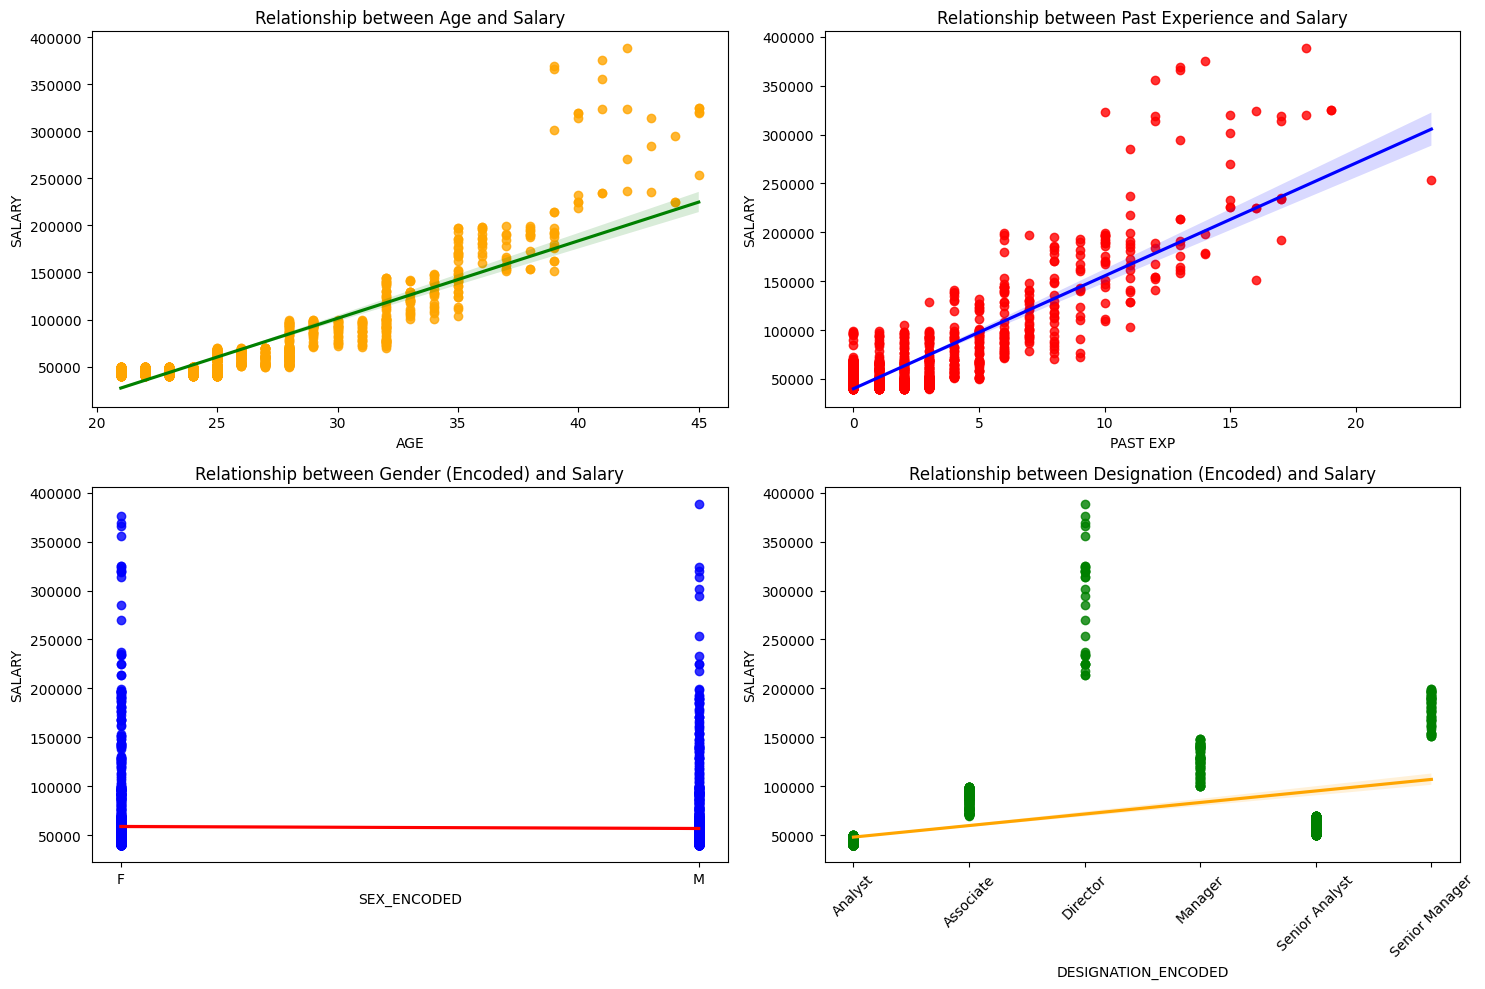

In [ ]:
# Encode categorical variables
df_encoded = df.copy()
label_encoder_sex = LabelEncoder()
label_encoder_designation = LabelEncoder()

df_encoded['SEX_ENCODED'] = label_encoder_sex.fit_transform(df['SEX'])
df_encoded['DESIGNATION_ENCODED'] = label_encoder_designation.fit_transform(df['DESIGNATION'])

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot for relationship between age and salary
sns.regplot(x='AGE', y='SALARY', data=df_encoded, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=axes[0, 0])
axes[0, 0].set_title('Relationship between Age and Salary')

# Scatter plot for relationship between past experience and salary
sns.regplot(x='PAST EXP', y='SALARY', data=df_encoded, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=axes[0, 1])
axes[0, 1].set_title('Relationship between Past Experience and Salary')

# Scatter plot for relationship between encoded gender and salary
sns.regplot(x='SEX_ENCODED', y='SALARY', data=df_encoded, scatter_kws={'color':'blue'}, line_kws={'color':'red'}, ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Gender (Encoded) and Salary')
axes[1, 0].set_xticks(range(len(label_encoder_sex.classes_)))
axes[1, 0].set_xticklabels(label_encoder_sex.classes_)

# Scatter plot for relationship between encoded designation and salary
sns.regplot(x='DESIGNATION_ENCODED', y='SALARY', data=df_encoded, scatter_kws={'color':'green'}, line_kws={'color':'orange'}, ax=axes[1, 1])
axes[1, 1].set_title('Relationship between Designation (Encoded) and Salary')
axes[1, 1].set_xticks(range(len(label_encoder_designation.classes_)))
axes[1, 1].set_xticklabels(label_encoder_designation.classes_, rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Detecting the outliers in the salary column using the IQR method
Q1 = df['SALARY'].quantile(0.25)  # First Quartile
Q3 = df['SALARY'].quantile(0.75)  # Third Quartile

# Calculation of Interquartile Range (IQR)
IQR = Q3 - Q1

# Detecting outliers lying 1.5x of IQR above Q3 and below Q1 respectively
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Identifying outliers
outliers = df[(df['SALARY'] < lower_bound) | (df['SALARY'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")
print(outliers)

# Optionally, handling the outliers
# For example, we can remove outliers from the dataset
df_cleaned = df[~((df['SALARY'] < lower_bound) | (df['SALARY'] > upper_bound))]

print(f"Number of records after removing outliers: {len(df_cleaned)}")

Lower bound: 31442.75
Upper bound: 63376.75
Number of outliers detected: 454
     FIRST NAME LAST NAME SEX        DOJ CURRENT DATE     DESIGNATION   AGE  \
1         ANNIE       NaN   F        NaN     1/7/2016       Associate   NaN   
8         KATHY     ALSOP   F  6/29/2014     1/7/2016  Senior Analyst  28.0   
11       VIRGIL    ACKIES   M   2/1/2010     1/7/2016  Senior Manager  36.0   
32       FOSTER  ALDERMAN   M  5/22/2014     1/7/2016  Senior Analyst  26.0   
33       MAUDIE  ARENIVAR   F   8/6/2011     1/7/2016       Associate  29.0   
...         ...       ...  ..        ...          ...             ...   ...   
2603   ALPHONSE    ALBANY   M  2/20/2012     1/7/2016  Senior Manager  38.0   
2608       LONA   ARGRAVE   F  11/2/2012     1/7/2016       Associate  32.0   
2611      GERRY     AHSAN   M  7/14/2011     1/7/2016       Associate  32.0   
2618     HATTIE     AMICO   F  8/12/2013     1/7/2016  Senior Analyst  26.0   
2634  KATHERINE    ALSDON   F  6/28/2011     1/7/2016 

In [ ]:
# Creating dummies for the categorical columns
categorical_columns = ['SEX', 'DESIGNATION', 'UNIT']
dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# Concatenating the dummies with the original dataframe
data = pd.concat([df, dummies], axis=1)

# Dropping the original categorical columns
data.drop(categorical_columns, inplace=True, axis=1)

# Displaying the first few rows of the prepared dataframe
print(data.head())

  FIRST NAME   LAST NAME         DOJ CURRENT DATE   AGE  SALARY  LEAVES USED  \
0     TOMASA       ARMEN   5/18/2014     1/7/2016  21.0   44570         24.0   
1      ANNIE         NaN         NaN     1/7/2016   NaN   89207          NaN   
2      OLIVE        ANCY   7/28/2014     1/7/2016  21.0   40955         23.0   
3     CHERRY     AQUILAR    4/3/2013     1/7/2016  22.0   45550         22.0   
4       LEON  ABOULAHOUD  11/20/2014     1/7/2016   NaN   43161         27.0   

   LEAVES REMAINING  RATINGS  PAST EXP  ...  DESIGNATION_Associate  \
0               6.0      2.0         0  ...                  False   
1              13.0      NaN         7  ...                   True   
2               7.0      3.0         0  ...                  False   
3               8.0      3.0         0  ...                  False   
4               3.0      NaN         3  ...                  False   

   DESIGNATION_Director  DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
0                 Fals

In [ ]:
# Separating the dataset into features and target

# Dataset conntaining all features from df
features = df.drop('SALARY',axis=1)

# Series containing target variable to be predicted
target = df['SALARY']

In [ ]:
# Splitting data into 25% training and 75% test sets

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(1979, 12)

In [ ]:
# Define models and hyperparameters for tuning
model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision_Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [2, 4, 6, 8, 10],
            'random_state': [0, 42],
            'min_samples_split': [2, 5, 10, 20]
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 20, 50, 80],
            'random_state': [0, 42],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}

In [ ]:
# Encode categorical variables
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  # Handle unknown categories
x_train_encoded = oe.fit_transform(x_train)
x_test_encoded = oe.transform(x_test)

# Create a pipeline with an imputer and the model
imputer = SimpleImputer(strategy='mean')

# Perform grid search for hyperparameters and collect the results
score = []

for model_name, mp in model_params.items():
    # Initialize the model inside the loop
    model = mp['model']
    pipeline = Pipeline([('imputer', imputer), ('model', model)])

    # Correct the hyperparameters
    params = {f'model__{key}': value for key, value in mp['params'].items()}

    clf = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    clf.fit(x_train_encoded, y_train)

    # Collect the summary of the best parameters and the mean squared error
    score.append({
        'Model': model_name,
        'Params': clf.best_params_,
        'MSE(-ve)': clf.best_score_
    })

    # Evaluate on the test set and print detailed metrics
    y_pred = clf.predict(x_test_encoded)
    print(f"Evaluation metrics for {model_name}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}\n")

# Display the summary DataFrame
print(pd.DataFrame(score))

Evaluation metrics for Linear_Regression:
MAE: 12495.723719756335
MSE: 399626120.45747924
RMSE: 19990.650826260742
R2 Score: 0.757497450984883

Evaluation metrics for Decision_Tree:
MAE: 4635.379532713275
MSE: 107480263.30835576
RMSE: 10367.26884518559
R2 Score: 0.9347784429324721

Evaluation metrics for Random_Forest:
MAE: 4648.251634982681
MSE: 119805226.47479302
RMSE: 10945.557385295324
R2 Score: 0.927299364785736

               Model                                             Params  \
0  Linear_Regression                                                 {}   
1      Decision_Tree  {'model__max_depth': 4, 'model__min_samples_sp...   
2      Random_Forest  {'model__max_depth': 20, 'model__min_samples_s...   

       MSE(-ve)  
0 -2.676056e+08  
1 -5.753585e+07  
2 -5.576282e+07  


In [ ]:
# Order of the best models

s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve)
2,Random_Forest,"{'model__max_depth': 20, 'model__min_samples_s...",-5.576282e+07
1,Decision_Tree,"{'model__max_depth': 4, 'model__min_samples_sp...",-5.753585e+07
0,Linear_Regression,{},-2.676056e+08


In [ ]:
# Random Forest model

rfr = RandomForestRegressor(n_estimators=20)
# Impute missing values in x_train_encoded before fitting
x_train_imputed = imputer.fit_transform(x_train_encoded)
rfr.fit(x_train_imputed,y_train) # Use the imputed training data

RandomForestRegressor(n_estimators=20)

In [ ]:
# Apply the same encoding used on the training data to the test data
x_test_encoded = oe.transform(x_test)

# Impute missing values in the encoded test data
x_test_imputed = imputer.transform(x_test_encoded)

# Now score using the encoded and imputed test data
rfr.score(x_test_imputed, y_test)

0.9328424115761103

In [ ]:
# Apply the same encoding used on the training data to the test data
x_test_encoded = oe.transform(x_test)

# Impute missing values in the encoded test data
x_test_imputed = imputer.transform(x_test_encoded)

# Now predict using the encoded and imputed test data
y_pred_rfr = rfr.predict(x_test_imputed)  # Use x_test_imputed instead of x_test

print("Mean Squared Error :", mean_squared_error(y_test, y_pred_rfr))

Mean Squared Error : 110670698.63849622


In [ ]:
# Decision Tree model
from sklearn.preprocessing import OneHotEncoder

# Assuming 'x_train' contains categorical features, we'll use OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
x_train_encoded = encoder.fit_transform(x_train)

dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dtr.fit(x_train_encoded,y_train)  # Fit with encoded data

DecisionTreeRegressor(max_depth=10, random_state=0)

In [ ]:
# Apply the same encoding used on the training data to the test data
x_test_encoded = encoder.transform(x_test)  # Use the fitted encoder

# Now score using the encoded test data
dtr.score(x_test_encoded, y_test)  # Use x_test_encoded instead of x_test

0.9554739313576657

In [ ]:
# Apply the same encoding used on the training data to the test data
x_test_encoded = encoder.transform(x_test)  # Use the fitted encoder

# Now predict using the encoded test data
y_pred_dtr = dtr.predict(x_test_encoded)  # Use x_test_encoded instead of x_test

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_dtr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr,squared=False))

Mean Squared Error : 73375641.38202226
Mean Absolute Error : 4317.108283832713
Root Mean Squared Error : 8565.958287431842


In [ ]:
# Linear regression model
from sklearn.preprocessing import OneHotEncoder

# Assuming 'x_train' contains categorical features, we'll use OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
x_train_encoded = encoder.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_encoded,y_train) # Fit the model with the encoded data

LinearRegression()

In [ ]:
# Apply the same encoding used on the training data to the test data
x_test_encoded = encoder.transform(x_test)  # Use the fitted encoder

# Now score using the encoded test data
lr.score(x_test_encoded, y_test)  # Use x_test_encoded instead of x_test

0.9243828177292719

In [ ]:
# Apply the same encoding used on the training data to the test data
x_test_encoded = encoder.transform(x_test)  # Use the fitted encoder

# Now predict using the encoded test data
y_pred_lr = lr.predict(x_test_encoded)  # Use x_test_encoded instead of x_test

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_lr,squared=False))

Mean Squared Error : 124611478.57416284
Mean Absolute Error : 4471.496949727891
Root Mean Squared Error : 11162.951158818301


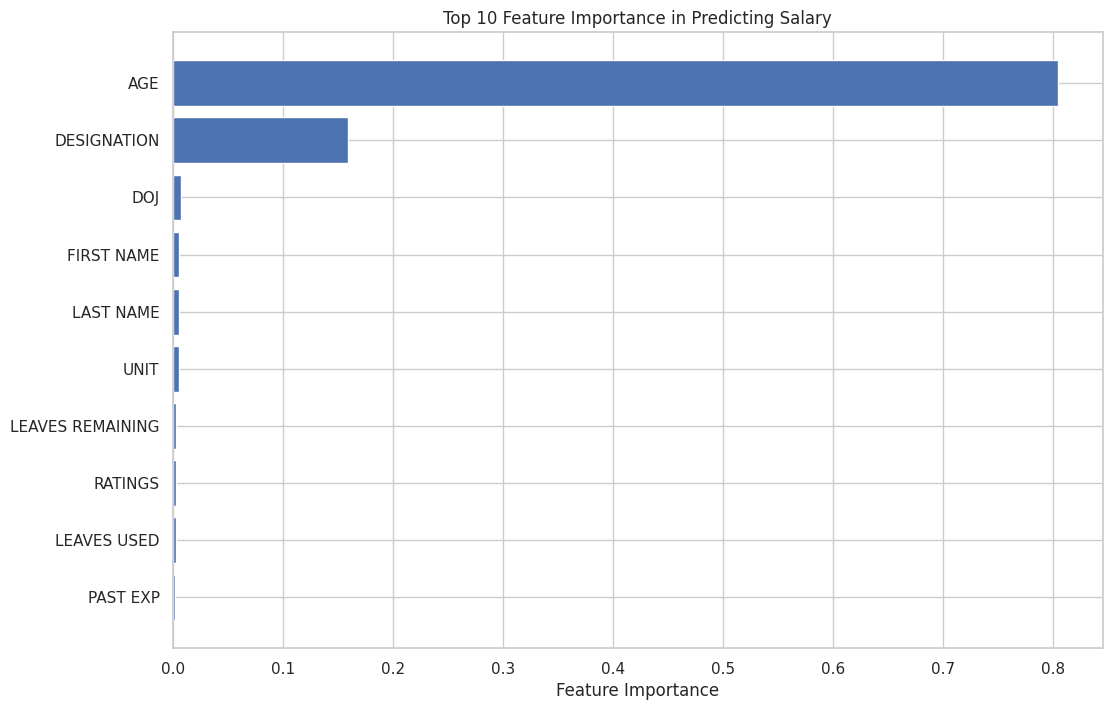

In [ ]:
# Access the feature importances of Random Forest Regressor
feature_importances = rfr.feature_importances_

# Assuming you have a list of feature names that corresponds to the feature importances
feature_names = list(x_train.columns)

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names[:10], sorted_feature_importances[:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance in Predicting Salary')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

**Summary:**

The machine learning model identifies age as the predominant factor in predicting salary, followed by job designation. Other features like the date of joining have minor importance, while factors such as unit, number of leaves, and performance ratings contribute very little to the salary prediction. The unexpected appearance of first and last names as features suggests potential quirks in the dataset but their impact is minimal. This reinforces the conclusion that age and designation are the primary determinants of salary in the given dataset.